In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# Análise dos microdados do censo escolar de 2012

In [19]:
m12 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Techlabs/Datasets filtrados/MATRICULA_SUL_2012.CSV', sep='|')

In [20]:
m12.shape

(7265282, 73)

Dataframe tem 73 colunas e mais de 7 milhões de linhas, então foi avaliado o arquivo de sumário dos dados e selecionadas somente as colunas que poderiam ser de interesse para esse estudo.

In [22]:
m12 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Techlabs/Datasets filtrados/MATRICULA_SUL_2012.CSV', sep='|', usecols=
                        ['FK_COD_ALUNO',
                        'NUM_IDADE',
                        'TP_SEXO',
                        'TP_COR_RACA',
                        'TP_NACIONALIDADE',
                        'ID_ZONA_RESIDENCIAL',
                        'ID_TIPO_ATENDIMENTO',
                        'ID_POSSUI_NEC_ESPECIAL',
                        'ID_TIPO_NEC_ESP_CEGUEIRA',
                        'ID_TIPO_NEC_ESP_BAIXA_VISAO',
                        'ID_TIPO_NEC_ESP_SURDEZ',
                        'ID_TIPO_NEC_ESP_DEF_AUDITIVA',
                        'ID_TIPO_NEC_ESP_SURDO_CEGUEIRA',
                        'ID_TIPO_NEC_ESP_DEF_FISICA',
                        'ID_TIPO_NEC_ESP_DEF_MENTAL',
                        'ID_TIPO_NEC_ESP_DEF_MULTIPLAS',
                        'ID_TIPO_NEC_ESP_AUTISMO',
                        'ID_TIPO_NEC_ESP_ASPERGER',
                        'ID_TIPO_NEC_ESP_RETT',
                        'ID_TIPO_NEC_ESP_TDI',
                        'ID_TIPO_NEC_ESP_SUPERDOTACAO',
                        'FK_COD_ETAPA_ENSINO',
                        'COD_UNIFICADA',
                        'FK_COD_TIPO_TURMA',
                        'PK_COD_ENTIDADE',
                        'ID_DEPENDENCIA_ADM_ESC',
                        'ID_LOCALIZACAO_ESC',
                        'FK_COD_MUNICIPIO_END'])

Como nosso interesse é no município de Curitiba e alunos do ensino fundamental, vamos filtrar o dataset para facilitar a análise inicial.

In [24]:
#Código para o município de Curitiba é 4106902
m12 = m12.query('FK_COD_MUNICIPIO_END == 4106902')

#Recodificando as etapas de ensino para facilitar
m12['FK_COD_ETAPA_ENSINO'].replace(14, 1, inplace=True) # 1° ano
m12['FK_COD_ETAPA_ENSINO'].replace([4, 15], 2, inplace=True) # 2° ano
m12['FK_COD_ETAPA_ENSINO'].replace([5, 16], 3, inplace=True) # 3° ano
m12['FK_COD_ETAPA_ENSINO'].replace([6, 17], 4, inplace=True) # 4° ano
m12['FK_COD_ETAPA_ENSINO'].replace([7, 18], 5, inplace=True) # 5° ano
m12['FK_COD_ETAPA_ENSINO'].replace([8, 19], 6, inplace=True) # 6° ano
m12['FK_COD_ETAPA_ENSINO'].replace([9, 20], 7, inplace=True) # 7° ano
m12['FK_COD_ETAPA_ENSINO'].replace([10, 21], 8, inplace=True) # 8° ano
m12['FK_COD_ETAPA_ENSINO'].replace([11, 41], 9, inplace=True) # 9° ano

#Variável com os códigos relacionados às séries/anos do ensino fundamental
filtro = [1, 2, 3, 4, 5, 6, 7, 8, 9]

#Filtro do ensino fundamental
m12 = m12[m12.FK_COD_ETAPA_ENSINO.isin(filtro)]

In [25]:
m12.shape

(251077, 28)

Verificando informações do dataset

In [26]:
m12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251077 entries, 136 to 6802363
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   FK_COD_ALUNO                    251077 non-null  int64  
 1   NUM_IDADE                       251077 non-null  int64  
 2   TP_SEXO                         251077 non-null  object 
 3   TP_COR_RACA                     251077 non-null  int64  
 4   TP_NACIONALIDADE                251077 non-null  int64  
 5   FK_COD_MUNICIPIO_END            251077 non-null  float64
 6   ID_ZONA_RESIDENCIAL             251077 non-null  int64  
 7   ID_TIPO_ATENDIMENTO             251077 non-null  int64  
 8   ID_POSSUI_NEC_ESPECIAL          251077 non-null  int64  
 9   ID_TIPO_NEC_ESP_CEGUEIRA        251077 non-null  int64  
 10  ID_TIPO_NEC_ESP_BAIXA_VISAO     251077 non-null  int64  
 11  ID_TIPO_NEC_ESP_SURDEZ          251077 non-null  int64  
 12  ID_TIPO_NEC_E

Com os dados filtrados não temos nenhum valor Null, podemos prosseguir para uma análise mais detalhada das colunas.
O FK_COD_ALUNO é a identificação de cada aluno, então verificaremos se há duplicatas.

In [28]:
m12.sort_values(by='FK_COD_ALUNO', ignore_index=True, inplace=True)
m12[m12.duplicated(subset='FK_COD_ALUNO', keep=False)]

,FK_COD_ALUNO,NUM_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,FK_COD_MUNICIPIO_END,ID_ZONA_RESIDENCIAL,ID_TIPO_ATENDIMENTO,ID_POSSUI_NEC_ESPECIAL,ID_TIPO_NEC_ESP_CEGUEIRA,ID_TIPO_NEC_ESP_BAIXA_VISAO,ID_TIPO_NEC_ESP_SURDEZ,ID_TIPO_NEC_ESP_DEF_AUDITIVA,ID_TIPO_NEC_ESP_SURDO_CEGUEIRA,ID_TIPO_NEC_ESP_DEF_FISICA,ID_TIPO_NEC_ESP_DEF_MENTAL,ID_TIPO_NEC_ESP_DEF_MULTIPLAS,ID_TIPO_NEC_ESP_AUTISMO,ID_TIPO_NEC_ESP_ASPERGER,ID_TIPO_NEC_ESP_RETT,ID_TIPO_NEC_ESP_TDI,ID_TIPO_NEC_ESP_SUPERDOTACAO,FK_COD_ETAPA_ENSINO,COD_UNIFICADA,FK_COD_TIPO_TURMA,PK_COD_ENTIDADE,ID_LOCALIZACAO_ESC,ID_DEPENDENCIA_ADM_ESC
17960,112019449888,17,M,0,1,4106902.0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.0,0,0,41127463,1,3
17961,112019449888,17,M,0,1,4106902.0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.0,0,0,41129725,1,2
18524,112088748619,6,M,2,1,4106902.0,1,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2.0,0,0,41129008,1,4
18525,112088748619,6,M,2,1,4106902.0,1,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2.0,0,0,41385950,1,3
42194,114960281200,7,M,0,1,4106902.0,1,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0,0,41377036,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250442,123664548565,3,F,4,1,4106902.0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,41149521,1,4
250444,123664841866,4,F,1,1,4106902.0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,41149521,1,4
250445,123664841866,4,F,1,1,4106902.0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,41149521,1,4
250466,123666316858,4,F,1,1,4106902.0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,41149521,1,4


Temos 81 alunos com registro duplicado, isso representa 0,03% somente.

Avaliando a coluna de idade

In [29]:
m12.NUM_IDADE.describe()

count    251077.000000
mean          9.320651
std           3.916813
min           0.000000
25%           6.000000
50%          10.000000
75%          13.000000
max          60.000000
Name: NUM_IDADE, dtype: float64

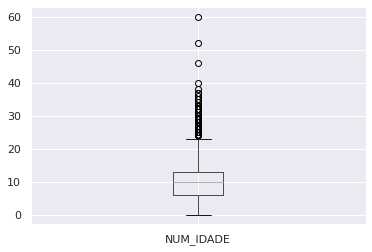

In [30]:
m12.boxplot(column='NUM_IDADE')

In [62]:
m12.NUM_IDADE.value_counts()

13    24059
12    23440
14    22375
11    21469
10    19811
8     19262
7     19047
9     18824
6     18227
5     14467
4     11771
3      9664
15     9482
2      7043
1      4588
16     4258
17     1796
18      664
0       257
19      224
20       87
21       74
22       34
23       33
24       20
25       20
26       15
28       15
29       10
27        9
32        6
33        5
30        5
35        3
37        3
34        2
31        2
40        1
46        1
52        1
38        1
36        1
60        1
Name: NUM_IDADE, dtype: int64

In [68]:
m12.query('NUM_IDADE>4' and 'NUM_IDADE<18').shape

(249840, 28)

Verificamos que há vários registros incorretos de idade, e quando aplicamos um filtro de 5 a 17 anos, eliminamos 1.237 linhas, o que representa 0,5% dos registros.

#Ajuste dos labels

In [72]:
m12.TP_SEXO.value_counts()/251077

M    0.515455
F    0.484545
Name: TP_SEXO, dtype: float64

In [75]:
m12.TP_COR_RACA = m12.TP_COR_RACA.map({0:'Não Declarada', 1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indígena'})
m12.TP_COR_RACA.value_counts()/251077

Branca           0.651330
Não Declarada    0.234295
Parda            0.097436
Preta            0.011084
Amarela          0.004835
Indígena         0.001020
Name: TP_COR_RACA, dtype: float64

In [76]:
m12.TP_NACIONALIDADE = m12.TP_NACIONALIDADE.map({1:'Brasileiro', 2:'Naturalizado', 3:'Extrangeiro'})
m12.TP_NACIONALIDADE.value_counts()/251077

Brasileiro      0.995782
Extrangeiro     0.002497
Naturalizado    0.001721
Name: TP_NACIONALIDADE, dtype: float64

In [77]:
m12.ID_ZONA_RESIDENCIAL = m12.ID_ZONA_RESIDENCIAL.map({1:'Urbana', 2:'Rural'})
m12.ID_ZONA_RESIDENCIAL.value_counts()/251077

Urbana    0.99765
Rural     0.00235
Name: ID_ZONA_RESIDENCIAL, dtype: float64

In [78]:
m12.ID_TIPO_ATENDIMENTO = m12.ID_TIPO_ATENDIMENTO.map({1:'Hospital', 2:'Domicilio', 3:'Não recebe'})
m12.ID_TIPO_ATENDIMENTO.value_counts()/251077

Não recebe    0.999215
Domicilio     0.000661
Hospital      0.000123
Name: ID_TIPO_ATENDIMENTO, dtype: float64

In [79]:
m12.ID_POSSUI_NEC_ESPECIAL = m12.ID_POSSUI_NEC_ESPECIAL.map({0:'Não', 1:'Sim'})
m12.ID_POSSUI_NEC_ESPECIAL.value_counts()/251077

Não    0.981691
Sim    0.018309
Name: ID_POSSUI_NEC_ESPECIAL, dtype: float64

In [82]:
m12.FK_COD_ETAPA_ENSINO.value_counts()/251077

1.0    0.193578
2.0    0.162914
7.0    0.106326
8.0    0.102498
6.0    0.099272
9.0    0.094784
3.0    0.085806
5.0    0.080609
4.0    0.074212
Name: FK_COD_ETAPA_ENSINO, dtype: float64

In [83]:
m12.COD_UNIFICADA = m12.COD_UNIFICADA.map({0:'Não', 1:'Unificada', 2:'Multietapa', 3:'Multi', 4:'Correção de fluxo', 5:'Mista'})
m12.COD_UNIFICADA.value_counts()/251077

Não                  0.998881
Correção de fluxo    0.000737
Unificada            0.000255
Multi                0.000127
Name: COD_UNIFICADA, dtype: float64

In [84]:
m12.FK_COD_TIPO_TURMA = m12.FK_COD_TIPO_TURMA.map({0:'Não se aplica', 1:'Classe Hospitalar', 2:'Unidade Socioeducativa',
                                           3:'Unidade prisional', 4:'Atividade complementar', 5:'At educacional especializado'})
m12.FK_COD_TIPO_TURMA.value_counts()/251077

Não se aplica        0.999817
Classe Hospitalar    0.000104
Unidade prisional    0.000080
Name: FK_COD_TIPO_TURMA, dtype: float64

In [85]:
m12.ID_LOCALIZACAO_ESC = m12.ID_LOCALIZACAO_ESC.map({1:'Urbana', 2:'Rural'})
m12.ID_LOCALIZACAO_ESC.value_counts()/251077

Urbana    0.999383
Rural     0.000617
Name: ID_LOCALIZACAO_ESC, dtype: float64

In [86]:
m12.ID_DEPENDENCIA_ADM_ESC = m12.ID_DEPENDENCIA_ADM_ESC.map({1:'Federal', 2:'Estadual', 3:'Municipal', 4:'Privada'})
m12.ID_DEPENDENCIA_ADM_ESC.value_counts()/251077

Municipal    0.426507
Estadual     0.307157
Privada      0.264429
Federal      0.001908
Name: ID_DEPENDENCIA_ADM_ESC, dtype: float64

# Verificando a distribuição dos dados

<BarContainer object of 2 artists>

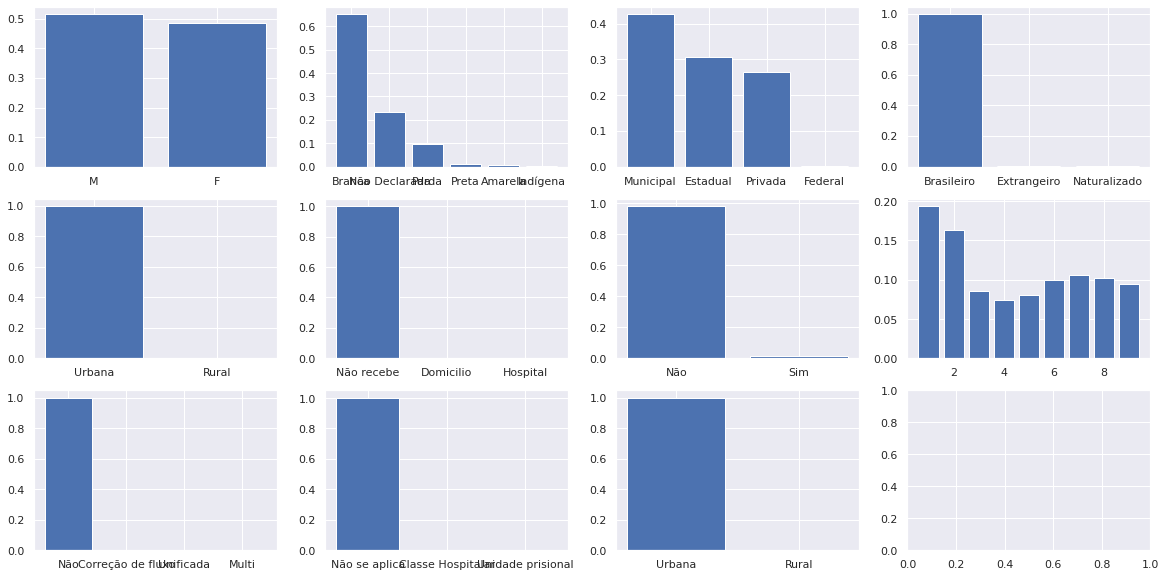

In [184]:
fig, axs = plt.subplots(3, 4, figsize=(20, 10))
    
axs[0, 0].bar((m12.TP_SEXO.value_counts()/251077).keys(), (m12.TP_SEXO.value_counts()/251077))
axs[0, 1].bar((m12.TP_COR_RACA.value_counts()/251077).keys(), (m12.TP_COR_RACA.value_counts()/251077))
axs[0, 2].bar((m12.ID_DEPENDENCIA_ADM_ESC.value_counts()/251077).keys(), (m12.ID_DEPENDENCIA_ADM_ESC.value_counts()/251077))
axs[0, 3].bar((m12.TP_NACIONALIDADE.value_counts()/251077).keys(), (m12.TP_NACIONALIDADE.value_counts()/251077))
axs[1, 0].bar((m12.ID_ZONA_RESIDENCIAL.value_counts()/251077).keys(), (m12.ID_ZONA_RESIDENCIAL.value_counts()/251077))
axs[1, 1].bar((m12.ID_TIPO_ATENDIMENTO.value_counts()/251077).keys(), (m12.ID_TIPO_ATENDIMENTO.value_counts()/251077))
axs[1, 2].bar((m12.ID_POSSUI_NEC_ESPECIAL.value_counts()/251077).keys(), (m12.ID_POSSUI_NEC_ESPECIAL.value_counts()/251077))
axs[1, 3].bar((m12.FK_COD_ETAPA_ENSINO.value_counts()/251077).keys(), (m12.FK_COD_ETAPA_ENSINO.value_counts()/251077))
axs[2, 0].bar((m12.COD_UNIFICADA.value_counts()/251077).keys(), (m12.COD_UNIFICADA.value_counts()/251077))
axs[2, 1].bar((m12.FK_COD_TIPO_TURMA.value_counts()/251077).keys(), (m12.FK_COD_TIPO_TURMA.value_counts()/251077))
axs[2, 2].bar((m12.ID_LOCALIZACAO_ESC.value_counts()/251077).keys(), (m12.ID_LOCALIZACAO_ESC.value_counts()/251077))

#Análise das escolas

In [187]:
m12.PK_COD_ENTIDADE.value_counts()

41128370    2055
41132602    1996
41127463    1633
41133463    1553
41377605    1439
            ... 
41135814       1
41137477       1
41140621       1
41027442       1
41032438       1
Name: PK_COD_ENTIDADE, Length: 2178, dtype: int64

Uma consulta ao site do INEP resultou que em Curitiba existem 1.164 escolas, e em nosso dataset temos 2.178 registros.

In [193]:
m12.PK_COD_ENTIDADE.value_counts().describe()

count    2178.000000
mean      115.278696
std       224.563109
min         1.000000
25%         1.000000
50%         6.000000
75%       116.000000
max      2055.000000
Name: PK_COD_ENTIDADE, dtype: float64

Vemos que 50% das escolas tem menos do que 6 alunos cadastrados.

Fazendo uma consulta manual de alguns colégios com número reduzido de alunos, concluimos que podem ter sido erros de digitação, pois esses colégios ficam em municípios da região metropolitana, ou até mesmo em outros estados!